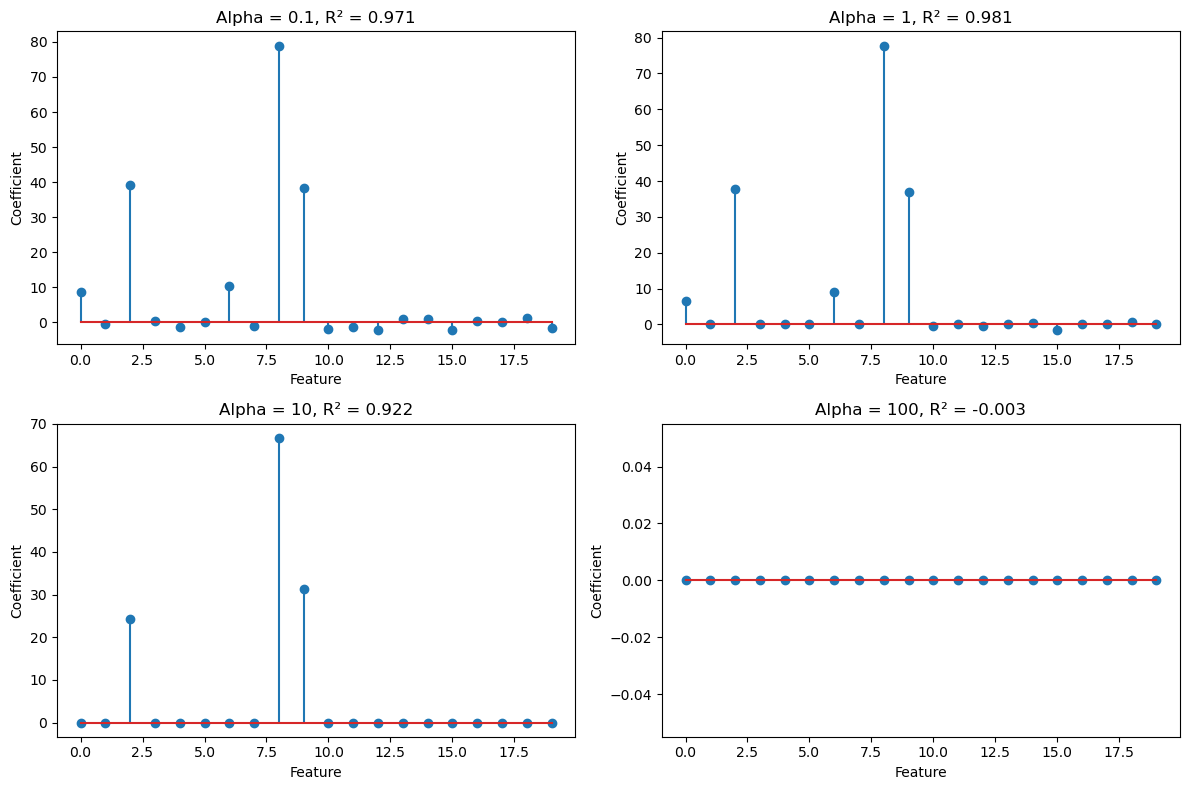

Alpha = 0.1:
  Non-zero coefficients: 19
  Non-zero features: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19]
  Intercept: -0.2854
  R² Score: 0.9706

Alpha = 1:
  Non-zero coefficients: 10
  Non-zero features: [ 0  2  6  8  9 10 12 14 15 18]
  Intercept: -0.3203
  R² Score: 0.9808

Alpha = 10:
  Non-zero coefficients: 3
  Non-zero features: [2 8 9]
  Intercept: 1.5998
  R² Score: 0.9216

Alpha = 100:
  Non-zero coefficients: 0
  Non-zero features: []
  Intercept: 9.8236
  R² Score: -0.0035



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from lasso_regression import LassoRegression

# Generate sample data
X, y = make_regression(n_samples=100, n_features=20, n_informative=5, noise=10, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Lasso Regression with different alpha values
alphas = [0.1, 1, 10, 100]
models = [LassoRegression(alpha=alpha) for alpha in alphas]

plt.figure(figsize=(12, 8))
for i, (model, alpha) in enumerate(zip(models, alphas)):
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    
    plt.subplot(2, 2, i+1)
    plt.stem(range(20), model.coef_)
    plt.title(f'Alpha = {alpha}, R² = {score:.3f}')
    plt.xlabel('Feature')
    plt.ylabel('Coefficient')

plt.tight_layout()
plt.show()

# Print non-zero coefficients and intercepts
for model, alpha in zip(models, alphas):
    print(f'Alpha = {alpha}:')
    non_zero = np.nonzero(model.coef_)[0]
    print(f'  Non-zero coefficients: {len(non_zero)}')
    print(f'  Non-zero features: {non_zero}')
    print(f'  Intercept: {model.intercept_:.4f}')
    print(f'  R² Score: {model.score(X_test, y_test):.4f}')
    print()